In [2]:
#import the tools
import pandas as pd
import numpy as np
import seaborn as sea
import matplotlib.pyplot as plt

In [3]:
#import the data set
df = pd.read_csv("/Users/pm3796gb/Downloads/SNAP (1).csv")

In [4]:
# take look at the data set
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-03-02,24.000000,26.049999,23.500000,24.480000,24.480000,217048900
1,2017-03-03,26.389999,29.440001,26.059999,27.090000,27.090000,148166400
2,2017-03-06,28.170000,28.250000,23.770000,23.770000,23.770000,72903000
3,2017-03-07,22.209999,22.500000,20.639999,21.440001,21.440001,71857800
4,2017-03-08,22.030001,23.430000,21.309999,22.809999,22.809999,49819100


In [5]:
#Overview of the metrics
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,704.000000,704.000000,704.000000,704.000000,704.000000,7.040000e+02
mean,13.708692,14.002295,13.408585,13.698892,13.698892,2.589036e+07
std,4.142317,4.228948,4.035893,4.114258,4.114258,2.148719e+07
min,4.960000,5.140000,4.820000,4.990000,4.990000,3.285700e+06
25%,11.167500,11.380000,10.952500,11.170000,11.170000,1.480685e+07
50%,14.135000,14.380000,13.815000,14.090000,14.090000,2.045305e+07
75%,15.922500,16.097500,15.522500,15.772500,15.772500,2.905610e+07
max,28.170000,29.440001,26.059999,27.090000,27.090000,2.323251e+08


In [6]:
#set the date as DATE
df["Date"]= pd.to_datetime(df["Date"])

In [7]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-03-02,24.000000,26.049999,23.500000,24.480000,24.480000,217048900
1,2017-03-03,26.389999,29.440001,26.059999,27.090000,27.090000,148166400
2,2017-03-06,28.170000,28.250000,23.770000,23.770000,23.770000,72903000
3,2017-03-07,22.209999,22.500000,20.639999,21.440001,21.440001,71857800
4,2017-03-08,22.030001,23.430000,21.309999,22.809999,22.809999,49819100


In [8]:
#Set the Date as index
df = df.set_index("Date")

//anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


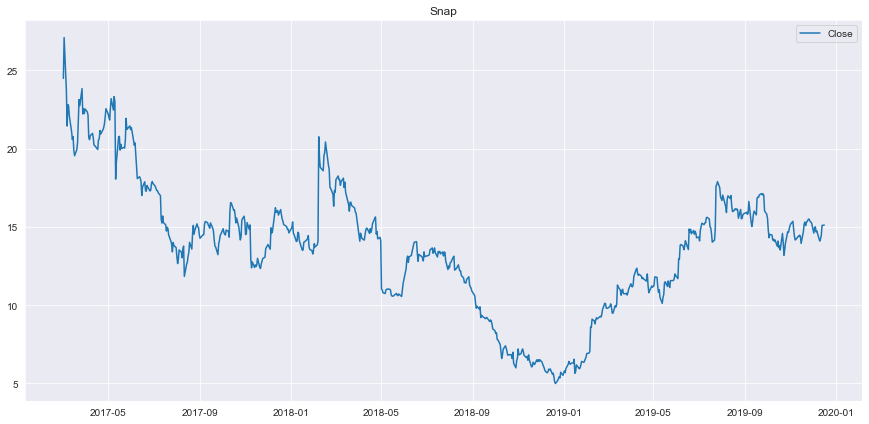

In [9]:
# Visualize the data
sea.set_style("darkgrid")
plt.figure(figsize=(15,7))
plt.plot(df["Close"],label='Close')
#plt.plot(df['Open'],label='Open')
plt.title("Snap")
plt.legend(loc='best')

In [10]:
#subset the data 
snap = df[["Close"]]
snap.head()

,Close
Date,
2017-03-02,24.480000
2017-03-03,27.090000
2017-03-06,23.770000
2017-03-07,21.440001
2017-03-08,22.809999


In [11]:
snap.shape

(704, 1)

# Seasonal Decompose

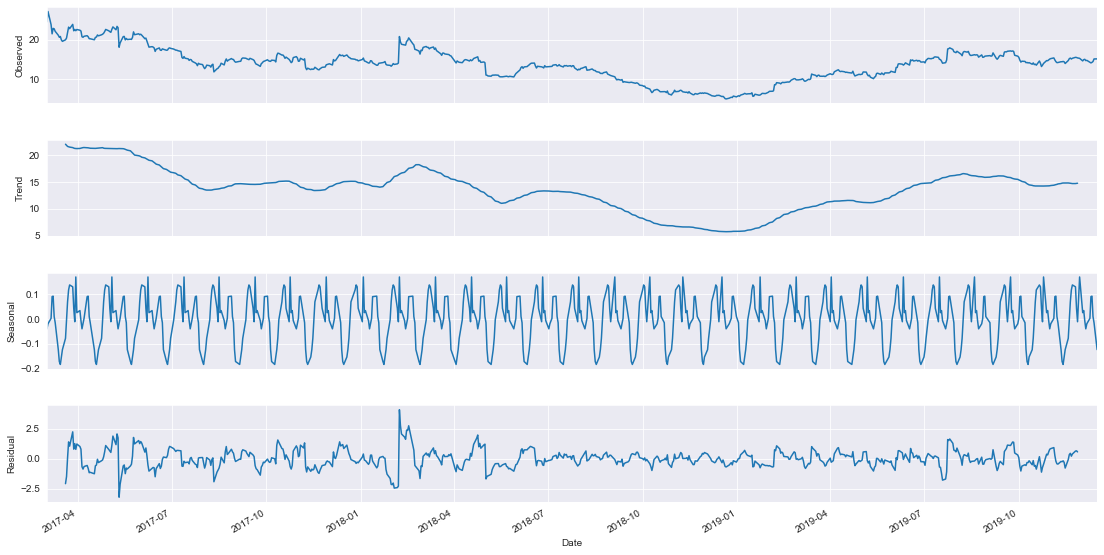

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(snap,freq=24)
fig = result.plot()
fig.set_size_inches(17,9)

# AUTO ARIMA 

In [13]:
from pmdarima import auto_arima
stepwise_model = auto_arima(snap,start_p=1, start_q=1,
                           max_p=5, max_q=5, m=24,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 24); AIC=1294.561, BIC=1317.164, Fit time=13.008 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 24); AIC=1582.318, BIC=1591.360, Fit time=0.599 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 24); AIC=1470.035, BIC=1488.117, Fit time=1.960 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 24); AIC=1296.450, BIC=1314.532, Fit time=6.420 seconds
Near non-invertible roots for order (0, 1, 1)(0, 1, 1, 24); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 24); AIC=1580.368, BIC=1584.889, Fit time=0.206 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 24); AIC=1581.222, BIC=1599.305, Fit time=0.736 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 24); AIC=1289.588, BIC=1316.712, Fit time=8.392 seconds
Near non-invertible roots for order (1, 1, 1)(1, 1, 1, 24); setting score to inf (at

In [14]:
stepwise_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  704
Model:             SARIMAX(1, 1, 1)x(0, 1, 2, 24)   Log Likelihood                -638.566
Date:                            Sun, 12 Jan 2020   AIC                           1289.133
Time:                                    17:04:52   BIC                           1316.257
Sample:                                         0   HQIC                          1299.632
                                            - 704                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0017      0.002      0.923      0.356      -0.002       0.005
ar.L1          0.5371      0.255      2.106      0.035       0.037       1.037
ma.L1         -0.6163      0.248     -2.490      0.013      -1.101      -0.131
ma.S.L24      -0.8769      0.340     -2.578      0.010      -1.544      -0.210
ma.S.L48      -0.1160      0.059     -1.973      0.049      -0.231      -0.001
sigma2         0.3454      0.117      2.961      0.003       0.117       0.574
===================================================================================
Ljung-Box (Q):                       32.71   Jarque-Bera (JB):             22687.36
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):               0.28   Skew:                             1.15
Prob(H) (two-sided):                  0.00   Kurtosis:                        31.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Train VS Test

In [15]:
size = 663
train_arima = snap[0:size]
test_arima = snap[size:]

In [113]:
round(len(snap)*0.8)

563

In [114]:
train_arima.tail()

,Close
Date,
2019-10-11,14.16
2019-10-14,13.76
2019-10-15,14.09
2019-10-16,13.67
2019-10-17,13.78


In [115]:
test_arima.head()

,Close
Date,
2019-10-18,13.52
2019-10-21,14.58
2019-10-22,14.00
2019-10-23,13.18
2019-10-24,13.52


In [116]:
fit_mod=stepwise_model.fit(train_arima)
fit_mod

ARIMA(maxiter=50, method='lbfgs', order=(1, 1, 1), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(0, 1, 2, 24),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

In [117]:
pre = fit_mod.predict(len(test_arima))
print(pre)

[13.88337591 14.03960322 14.10844682 14.09048937 14.0912155  14.30196229
 14.17579309 14.22921097 14.2073236  14.08914993 14.20230755 14.1184218
 14.07814378 14.11367091 14.10808318 14.09136094 13.95511307 13.93873915
 13.94343055 14.00610376 14.02458598 14.19543297 14.2260474  14.33660775
 14.45598643 14.47938129 14.53254523 14.50882239 14.4897188  14.7211542
 14.59232319 14.64754811 14.64094878 14.63431541 14.80167665 14.73348532
 14.78861104 14.90186796 14.87096458 14.86480981 14.7565844 ]


In [118]:
future_forecast = pd.DataFrame(pre,index = test_arima.index,columns=['Forecast'])
#pd.concat([test,forecast],axis=1).iplot()

In [119]:
future_forecast

,Forecast
Date,
2019-10-18,13.883376
2019-10-21,14.039603
2019-10-22,14.108447
2019-10-23,14.090489
2019-10-24,14.091216
2019-10-25,14.301962
2019-10-28,14.175793
2019-10-29,14.229211
2019-10-30,14.207324


In [120]:
test_arima

,Close
Date,
2019-10-18,13.52
2019-10-21,14.58
2019-10-22,14.00
2019-10-23,13.18
2019-10-24,13.52
2019-10-25,13.96
2019-10-28,14.68
2019-10-29,14.64
2019-10-30,14.86


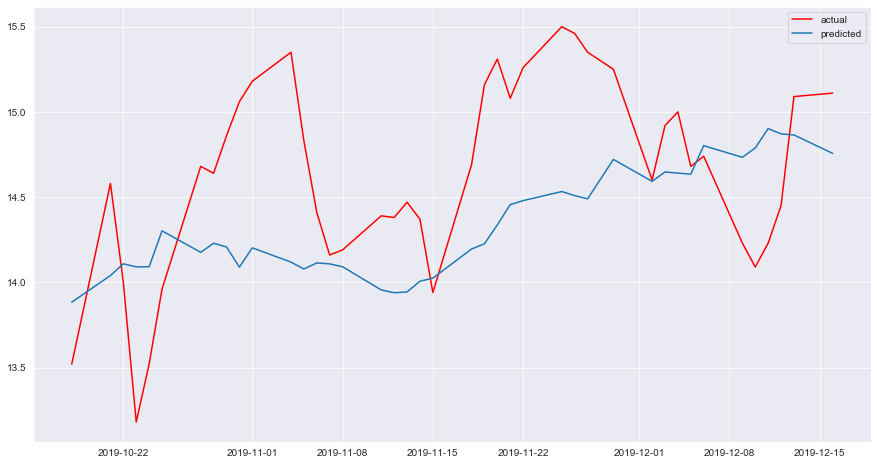

In [121]:
plt.figure(figsize=(15,8))
plt.plot(test_arima,'red' ,label='actual')
plt.plot(future_forecast,label='predicted')
plt.legend(loc='best')

In [122]:
mse_AutoArima = mean_squared_error(test_arima,future_forecast)
print("MSE:{}".format(mse_AutoArima))

MSE:0.3687049671546485


# ARIMA 

In [131]:
from statsmodels.tsa.arima_model import ARIMA
mod_arima = ARIMA(train_arima, order=(2,0,2))

//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [132]:
arima_fit = mod_arima.fit()

//anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [133]:
print(arima_fit.summary())
print(arima_fit)

                              ARMA Model Results                              
Dep. Variable:                  Close   No. Observations:                  663
Model:                     ARMA(2, 2)   Log Likelihood                -594.732
Method:                       css-mle   S.D. of innovations              0.591
Date:                Mon, 13 Jan 2020   AIC                           1201.463
Time:                        22:02:34   BIC                           1228.444
Sample:                             0   HQIC                          1211.919
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          15.6557      3.242      4.829      0.000       9.301      22.010
ar.L1.Close     0.3986      0.321      1.242      0.215      -0.231       1.028
ar.L2.Close     0.5929      0.319      1.861    

In [134]:
future = arima_fit.predict(0,40)

In [135]:
fut = list(future)
fut

[15.655711390226259,
 24.420348947423506,
 26.876305740411464,
 23.68898680313251,
 21.925191974103605,
 22.684059735528013,
 22.61805054545973,
 22.094753734888638,
 21.145298378383675,
 20.653989941345635,
 20.744612244609804,
 19.898126747973556,
 19.622419309561035,
 19.87237642359862,
 20.311981887257016,
 21.671963988085977,
 22.90119092208019,
 22.64940262863275,
 23.77470282012588,
 22.124431555060834,
 22.708178944913318,
 22.05359816367097,
 22.609734342930082,
 22.20208260058446,
 22.206973609826704,
 20.70043275766428,
 20.71487541723156,
 20.70071746104475,
 20.969685633740625,
 20.638779022933612,
 20.27086691221537,
 20.175580073061077,
 19.933741999754066,
 20.509604282196086,
 20.52270658708985,
 21.116577253880656,
 20.83949078038495,
 21.210996764969636,
 21.23579150628116,
 21.55897942033102,
 21.904935289720623]

In [136]:
test_arima.head()

,Close
Date,
2019-10-18,13.52
2019-10-21,14.58
2019-10-22,14.00
2019-10-23,13.18
2019-10-24,13.52


In [137]:
fut

[15.655711390226259,
 24.420348947423506,
 26.876305740411464,
 23.68898680313251,
 21.925191974103605,
 22.684059735528013,
 22.61805054545973,
 22.094753734888638,
 21.145298378383675,
 20.653989941345635,
 20.744612244609804,
 19.898126747973556,
 19.622419309561035,
 19.87237642359862,
 20.311981887257016,
 21.671963988085977,
 22.90119092208019,
 22.64940262863275,
 23.77470282012588,
 22.124431555060834,
 22.708178944913318,
 22.05359816367097,
 22.609734342930082,
 22.20208260058446,
 22.206973609826704,
 20.70043275766428,
 20.71487541723156,
 20.70071746104475,
 20.969685633740625,
 20.638779022933612,
 20.27086691221537,
 20.175580073061077,
 19.933741999754066,
 20.509604282196086,
 20.52270658708985,
 21.116577253880656,
 20.83949078038495,
 21.210996764969636,
 21.23579150628116,
 21.55897942033102,
 21.904935289720623]

In [138]:
frcst = pd.DataFrame(fut,index=test_arima.index,columns=['Forecast'])
frcst

,Forecast
Date,
2019-10-18,15.655711
2019-10-21,24.420349
2019-10-22,26.876306
2019-10-23,23.688987
2019-10-24,21.925192
2019-10-25,22.684060
2019-10-28,22.618051
2019-10-29,22.094754
2019-10-30,21.145298


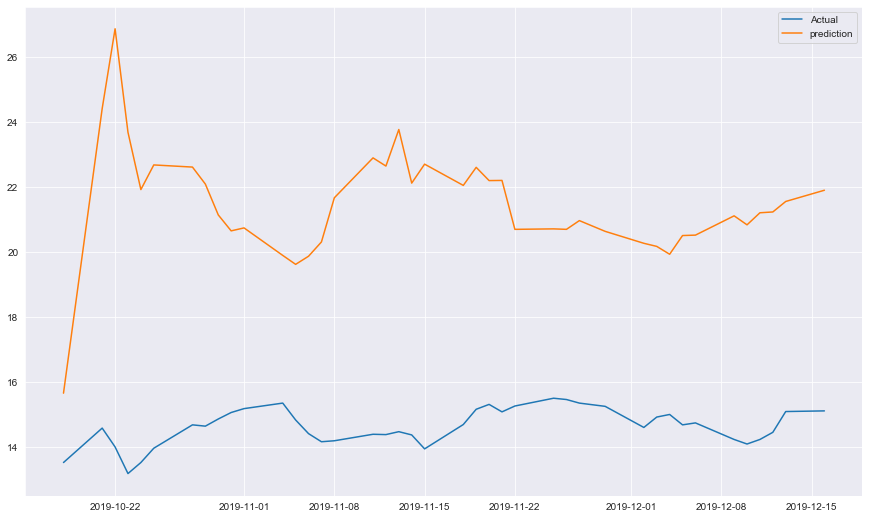

In [139]:
#plt.plot(frcst)
plt.figure(figsize=(15,9))
plt.plot(test_arima,label='Actual')
plt.plot(frcst,label='prediction')
plt.legend(loc='best')

In [140]:
from sklearn.metrics import mean_squared_error
mse_arima = mean_squared_error(test_arima, frcst)
print('MSE:',mse_arima)

MSE: 50.163098907240546


# KERAS

In [61]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from sklearn.metrics import mean_squared_error

In [62]:
snap[90:200]

,Close
Date,
2017-07-11,15.470000
2017-07-12,15.240000
2017-07-13,15.690000
2017-07-14,15.270000
2017-07-17,15.130000
2017-07-18,14.730000
2017-07-19,14.970000
2017-07-20,14.890000
2017-07-21,14.480000


# TimeStep

In [87]:
x=[]
y=[]
timestep=30
for i in range(len(snap)-timestep):
    x.append(snap.values[i:(i+timestep)])
    y.append(snap.values[(i+timestep)])
    
   # x_goal.append(goals[i:(i+step)])
   # y_goal.append(goals[(i+step)])

In [88]:
X = np.array(x)
Y=np.array(y)

In [89]:
print(X.shape)
print(Y.shape)

(674, 30, 1)
(674, 1)


In [90]:
X_g=np.reshape(X,(X.shape[0],X.shape[1]))
X_g.shape

(674, 30)

In [91]:
Y_g = np.reshape(Y,(Y.shape[0]))

In [92]:
Y_g.shape

(674,)

In [93]:
ncol=X_g.shape[1]
ncol

30

In [94]:
x_train=X_g[:664]
y_train=Y_g[:664]
x_test = X_g[664:]
y_test=Y_g[664:]
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(664, 30)
(664,)
(10, 30)
(10,)


In [95]:
model = Sequential()

In [96]:
model.add(Dense(100,activation='relu',input_shape=(ncol,)))
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(1))
model.compile(loss='mse',optimizer='adam')
mod = model.fit(X_g,Y_g,validation_split=0.3,verbose=2,epochs = 300)

Train on 471 samples, validate on 203 samples
Epoch 1/300
 - 0s - loss: 22.5073 - val_loss: 3.6732
Epoch 2/300
 - 0s - loss: 2.4100 - val_loss: 0.9784
Epoch 3/300
 - 0s - loss: 1.8218 - val_loss: 0.8773
Epoch 4/300
 - 0s - loss: 1.6321 - val_loss: 0.7293
Epoch 5/300
 - 0s - loss: 1.5450 - val_loss: 0.9642
Epoch 6/300
 - 0s - loss: 1.3604 - val_loss: 0.7476
Epoch 7/300
 - 0s - loss: 1.2693 - val_loss: 0.6903
Epoch 8/300
 - 0s - loss: 1.1120 - val_loss: 0.6713
Epoch 9/300
 - 0s - loss: 1.0215 - val_loss: 0.5466
Epoch 10/300
 - 0s - loss: 0.9738 - val_loss: 0.5926
Epoch 11/300
 - 0s - loss: 0.9029 - val_loss: 0.5173
Epoch 12/300
 - 0s - loss: 0.8657 - val_loss: 0.4750
Epoch 13/300
 - 0s - loss: 0.8373 - val_loss: 0.4561
Epoch 14/300
 - 0s - loss: 0.8605 - val_loss: 0.5971
Epoch 15/300
 - 0s - loss: 0.8243 - val_loss: 0.4614
Epoch 16/300
 - 0s - loss: 0.8351 - val_loss: 0.5683
Epoch 17/300
 - 0s - loss: 0.7277 - val_loss: 0.4406
Epoch 18/300
 - 0s - loss: 0.7278 - val_loss: 0.5689
Epoch 19

Epoch 154/300
 - 0s - loss: 0.5618 - val_loss: 0.3726
Epoch 155/300
 - 0s - loss: 0.4436 - val_loss: 0.2645
Epoch 156/300
 - 0s - loss: 0.3675 - val_loss: 0.6809
Epoch 157/300
 - 0s - loss: 0.4525 - val_loss: 0.5351
Epoch 158/300
 - 0s - loss: 0.4301 - val_loss: 0.2618
Epoch 159/300
 - 0s - loss: 0.3897 - val_loss: 0.4162
Epoch 160/300
 - 0s - loss: 0.4132 - val_loss: 0.2804
Epoch 161/300
 - 0s - loss: 0.3985 - val_loss: 0.2531
Epoch 162/300
 - 0s - loss: 0.6583 - val_loss: 0.5062
Epoch 163/300
 - 0s - loss: 0.4527 - val_loss: 0.4065
Epoch 164/300
 - 0s - loss: 0.6627 - val_loss: 0.2898
Epoch 165/300
 - 0s - loss: 0.3852 - val_loss: 0.2899
Epoch 166/300
 - 0s - loss: 0.3665 - val_loss: 0.3875
Epoch 167/300
 - 0s - loss: 0.4210 - val_loss: 0.3468
Epoch 168/300
 - 0s - loss: 0.4886 - val_loss: 0.3052
Epoch 169/300
 - 0s - loss: 0.4235 - val_loss: 0.2726
Epoch 170/300
 - 0s - loss: 0.3891 - val_loss: 0.2712
Epoch 171/300
 - 0s - loss: 0.4267 - val_loss: 0.2919
Epoch 172/300
 - 0s - loss: 

In [97]:
#tes = (mod.validation_data[0])
prediction = model.predict(mod.validation_data[0],verbose=1)

203/203 [==============================] - 0s 77us/step


In [98]:
#prediction

In [99]:
len(mod.validation_data)

3

In [100]:
mse = mean_squared_error(mod.validation_data[1],prediction)
print("MSE {}".format((mse)))

MSE 0.39196850296822455


In [101]:
r = pd.DataFrame(zip(prediction,mod.validation_data[1]),columns=["prediction","Actual"])
r.head(100)

,prediction,Actual
0,[9.886113],[9.8]
1,[9.929489],[9.8]
2,[9.795199],[9.92]
3,[9.8962555],[10.08]
4,[9.927756],[9.87]
5,[9.646393],[9.49]
6,[9.420106],[9.48]
7,[9.25526],[9.96]
8,[9.555495],[9.88]
9,[9.691348],[10.05]


(array([ 8., 10., 12., 14., 16., 18., 20.]),
 <a list of 7 Text yticklabel objects>)

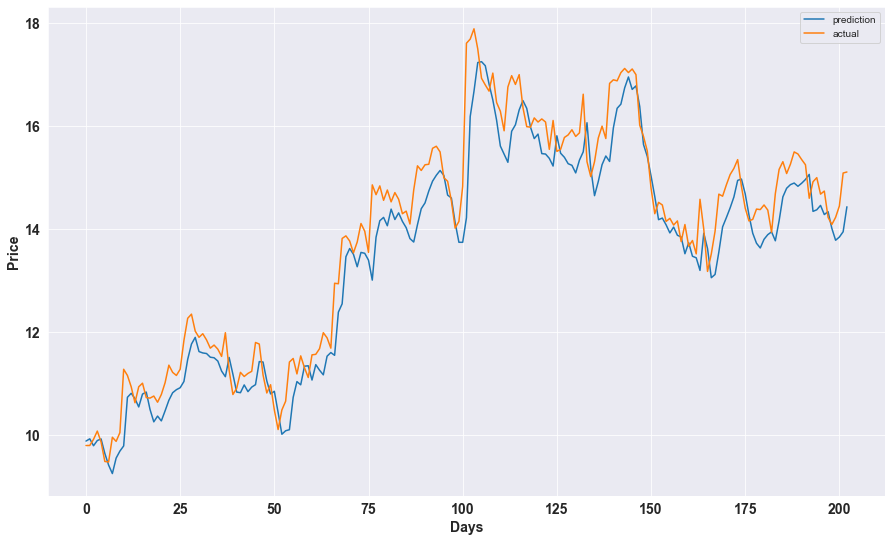

In [102]:
plt.figure(figsize=(15,9))
plt.plot(prediction,label="prediction")
plt.plot(mod.validation_data[1],label="actual")
plt.legend(loc='best')
plt.xlabel("Days",weight='bold',fontsize=14)
plt.ylabel("Price",weight='bold',fontsize=14)
plt.xticks(weight='bold',fontsize=14)
plt.yticks(weight='bold',fontsize=14)

first =0   # this section for unknown future 
future=170
forcast_cnn = []
Xin = Xtest[first:first+1,:,:]
for i in range(future):
    out = model.predict(Xin, batch_size=1)    
    forcast_cnn.append(out[0,0]) 
    Xin = insert_end(Xin,out[0,0]) 

In [103]:
model.add(Dense(100,activation='relu',input_shape=(x_train.shape[1],)))
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(1))
model.compile(loss='mse',optimizer='adam')
mod = model.fit(x_train,y_train,verbose=2,epochs = 300)

Epoch 1/300
 - 0s - loss: 36.5608
Epoch 2/300
 - 0s - loss: 2.0838
Epoch 3/300
 - 0s - loss: 0.9186
Epoch 4/300
 - 0s - loss: 0.6197
Epoch 5/300
 - 0s - loss: 0.5478
Epoch 6/300
 - 0s - loss: 0.5024
Epoch 7/300
 - 0s - loss: 0.4996
Epoch 8/300
 - 0s - loss: 0.4852
Epoch 9/300
 - 0s - loss: 0.4552
Epoch 10/300
 - 0s - loss: 0.4331
Epoch 11/300
 - 0s - loss: 0.4566
Epoch 12/300
 - 0s - loss: 0.4129
Epoch 13/300
 - 0s - loss: 0.4523
Epoch 14/300
 - 0s - loss: 0.3958
Epoch 15/300
 - 0s - loss: 0.4436
Epoch 16/300
 - 0s - loss: 0.4456
Epoch 17/300
 - 0s - loss: 0.3900
Epoch 18/300
 - 0s - loss: 0.4018
Epoch 19/300
 - 0s - loss: 0.4113
Epoch 20/300
 - 0s - loss: 0.3876
Epoch 21/300
 - 0s - loss: 0.3899
Epoch 22/300
 - 0s - loss: 0.3867
Epoch 23/300
 - 0s - loss: 0.4192
Epoch 24/300
 - 0s - loss: 0.4175
Epoch 25/300
 - 0s - loss: 0.3903
Epoch 26/300
 - 0s - loss: 0.4115
Epoch 27/300
 - 0s - loss: 0.4616
Epoch 28/300
 - 0s - loss: 0.3679
Epoch 29/300
 - 0s - loss: 0.4348
Epoch 30/300
 - 0s - l

 - 0s - loss: 0.3459
Epoch 239/300
 - 0s - loss: 0.4449
Epoch 240/300
 - 0s - loss: 0.3397
Epoch 241/300
 - 0s - loss: 0.3565
Epoch 242/300
 - 0s - loss: 0.3612
Epoch 243/300
 - 0s - loss: 0.4008
Epoch 244/300
 - 0s - loss: 0.3518
Epoch 245/300
 - 0s - loss: 0.3651
Epoch 246/300
 - 0s - loss: 0.4232
Epoch 247/300
 - 0s - loss: 0.3805
Epoch 248/300
 - 0s - loss: 0.3704
Epoch 249/300
 - 0s - loss: 0.3422
Epoch 250/300
 - 0s - loss: 0.3167
Epoch 251/300
 - 0s - loss: 0.2978
Epoch 252/300
 - 0s - loss: 0.3214
Epoch 253/300
 - 0s - loss: 0.3248
Epoch 254/300
 - 0s - loss: 0.4839
Epoch 255/300
 - 0s - loss: 0.4625
Epoch 256/300
 - 0s - loss: 0.3162
Epoch 257/300
 - 0s - loss: 0.3485
Epoch 258/300
 - 0s - loss: 0.4101
Epoch 259/300
 - 0s - loss: 0.4199
Epoch 260/300
 - 0s - loss: 0.3401
Epoch 261/300
 - 0s - loss: 0.3646
Epoch 262/300
 - 0s - loss: 0.3541
Epoch 263/300
 - 0s - loss: 0.3325
Epoch 264/300
 - 0s - loss: 0.5812
Epoch 265/300
 - 0s - loss: 0.3540
Epoch 266/300
 - 0s - loss: 0.3887

In [104]:
pred = model.predict(x_test)

In [105]:
list(pred)

[array([14.811163], dtype=float32),
 array([14.870082], dtype=float32),
 array([14.931075], dtype=float32),
 array([14.681212], dtype=float32),
 array([14.787691], dtype=float32),
 array([14.37627], dtype=float32),
 array([14.094303], dtype=float32),
 array([14.21366], dtype=float32),
 array([14.384599], dtype=float32),
 array([14.936755], dtype=float32)]

In [106]:
Pred = list(pred)

In [107]:
np.array(y_test)

array([14.92, 15.  , 14.68, 14.74, 14.23, 14.09, 14.23, 14.45, 15.09,
       15.11])

In [108]:
Y_test = list(y_test)

In [109]:
mse_keras = mean_squared_error(y_test,Pred)
print("MSE {}".format((mse_keras)))

MSE 0.1090063800215764


(array([14. , 14.2, 14.4, 14.6, 14.8, 15. , 15.2]),
 <a list of 7 Text yticklabel objects>)

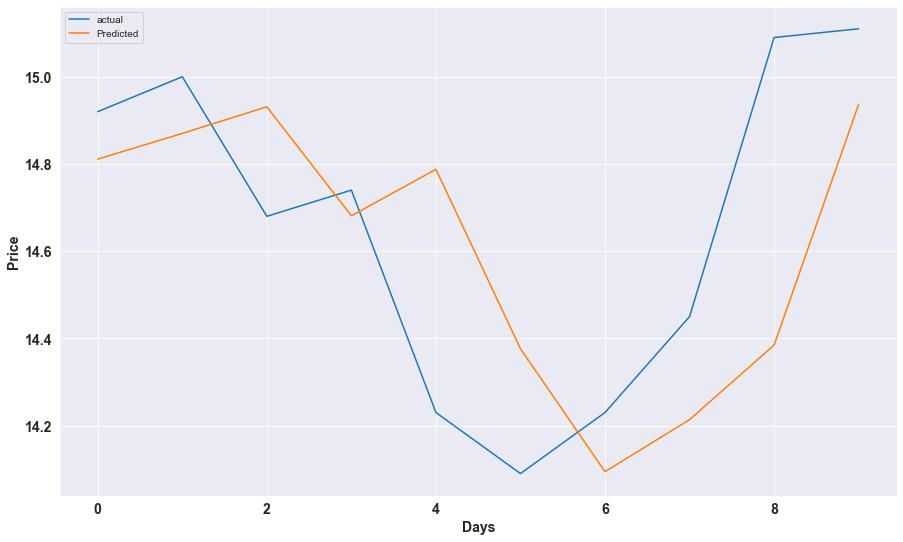

In [110]:
plt.figure(figsize=(15,9))
plt.plot(y_test,label="actual")
plt.plot(Pred,label='Predicted')
plt.legend(loc='best')
plt.xlabel("Days",weight='bold',fontsize=14)
plt.ylabel("Price",weight='bold',fontsize=14)
plt.xticks(weight='bold',fontsize=14)
plt.yticks(weight='bold',fontsize=14)


In [149]:
first =0   # this section for unknown future 
future=20
forcast_cnn = []
Xin = x_test[first:first+1]
for i in range(future):
    out = model.predict(Xin)    
    forcast_cnn.append(out[0,0]) 
    #Xin = insert_end(Xin,out[0,0]) 

In [150]:
forcast_cnn

[14.811164,
 14.811164,
 14.811164,
 14.811164,
 14.811164,
 14.811164,
 14.811164,
 14.811164,
 14.811164,
 14.811164,
 14.811164,
 14.811164,
 14.811164,
 14.811164,
 14.811164,
 14.811164,
 14.811164,
 14.811164,
 14.811164,
 14.811164]

In [154]:
Xin

array([[14.58, 14.  , 13.18, 13.52, 13.96, 14.68, 14.64, 14.86, 15.06,
        15.18, 15.35, 14.83, 14.41, 14.16, 14.19, 14.39, 14.38, 14.47,
        14.37, 13.94, 14.69, 15.16, 15.31, 15.08, 15.26, 15.5 , 15.46,
        15.35, 15.25, 14.6 ]])